In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yaml
import math
import ipyleaflet as ipyl
import json
import matplotlib as mpl
import matplotlib.cm
import matplotlib.colors
import ipywidgets as ipyw
%matplotlib inline

In [2]:
train = pd.read_csv("./data/all/train.csv")

In [3]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [4]:
train.shape

(32769, 10)

In [20]:
len(train) == len(train.drop_duplicates())

True

In [5]:
train.isnull().sum()

ACTION              0
RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
dtype: int64

Binary classificaiton problem - what is the distribution of the target variable?

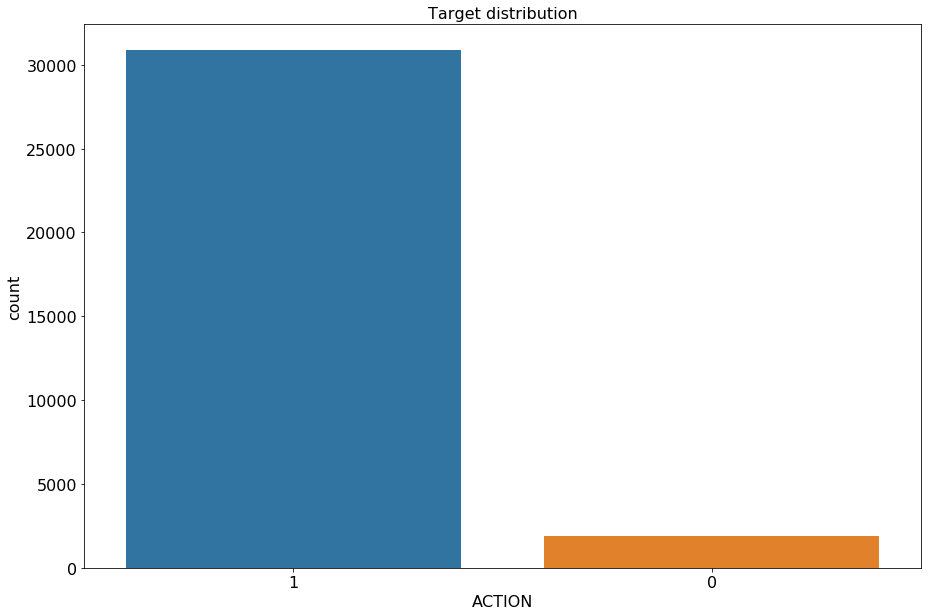

In [11]:
plt.figure(figsize=(15,10))
ax = sns.countplot(train["ACTION"],order=[1,0])
ax.set(title="Target distribution")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)
plt.show()

Massive class imbalance! Might need to consider under/ over sampling....

In [17]:
train.apply(pd.Series.nunique, axis=0)

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

Resources can apply multiple times it seems as well

In [22]:
train.groupby(["RESOURCE"]).size().sort_values(ascending=False).reset_index().head(100)

,RESOURCE,0
0,4675,839
1,79092,484
2,25993,409
3,75078,409
4,3853,404
5,6977,299
6,75834,299
7,32270,295
8,42085,247
9,17308,239


In [ ]:
sns.barplot(data=train.groupby(["RESOURCE"]).size().sort_values(ascending=False).reset_index().head(100))